In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### customerID column does not seem relevant. So we drop this column

In [5]:
df.drop('customerID', axis=1, inplace=True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### Convert Total Charges column to numeric datatype and then drop null values. It is the only column with empty data

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna( inplace=True)

In [10]:
df.shape

(7032, 20)

#### check for duplicates

In [11]:
df.duplicated().sum()

22

### We see 22 duplicates.

In [12]:
df.drop_duplicates(keep='first', inplace=True)

In [13]:
df.shape

(7010, 20)

#### Let us look at the value_counts for each of the categorical columns 

In [14]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print()

gender
Male      3535
Female    3475
Name: count, dtype: int64

Partner
No     3617
Yes    3393
Name: count, dtype: int64

Dependents
No     4911
Yes    2099
Name: count, dtype: int64

PhoneService
Yes    6330
No      680
Name: count, dtype: int64

MultipleLines
No                  3363
Yes                 2967
No phone service     680
Name: count, dtype: int64

InternetService
Fiber optic    3090
DSL            2414
No             1506
Name: count, dtype: int64

OnlineSecurity
No                     3489
Yes                    2015
No internet service    1506
Name: count, dtype: int64

OnlineBackup
No                     3079
Yes                    2425
No internet service    1506
Name: count, dtype: int64

DeviceProtection
No                     3086
Yes                    2418
No internet service    1506
Name: count, dtype: int64

TechSupport
No                     3464
Yes                    2040
No internet service    1506
Name: count, dtype: int64

StreamingTV
No                 

In [15]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## EDA

### Let us look at the distribution of numerical features

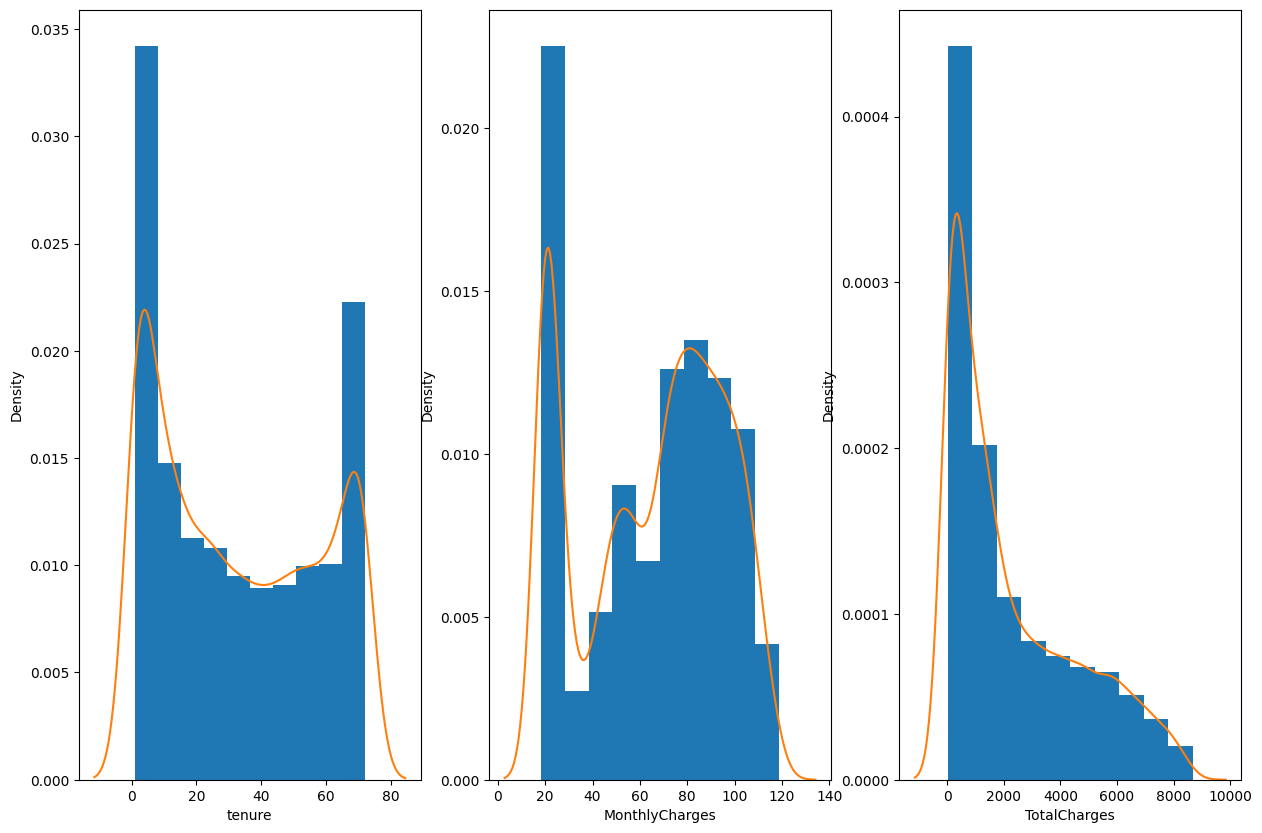

In [16]:
numer_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10))

for i, ax in enumerate(axes):
    ax.hist(df[numer_col[i]], density=True)
    sns.kdeplot(df[numer_col[i]], ax=ax)

plt.show()

In [17]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Let us look at countplots of categorical features

In [18]:
cat_feat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

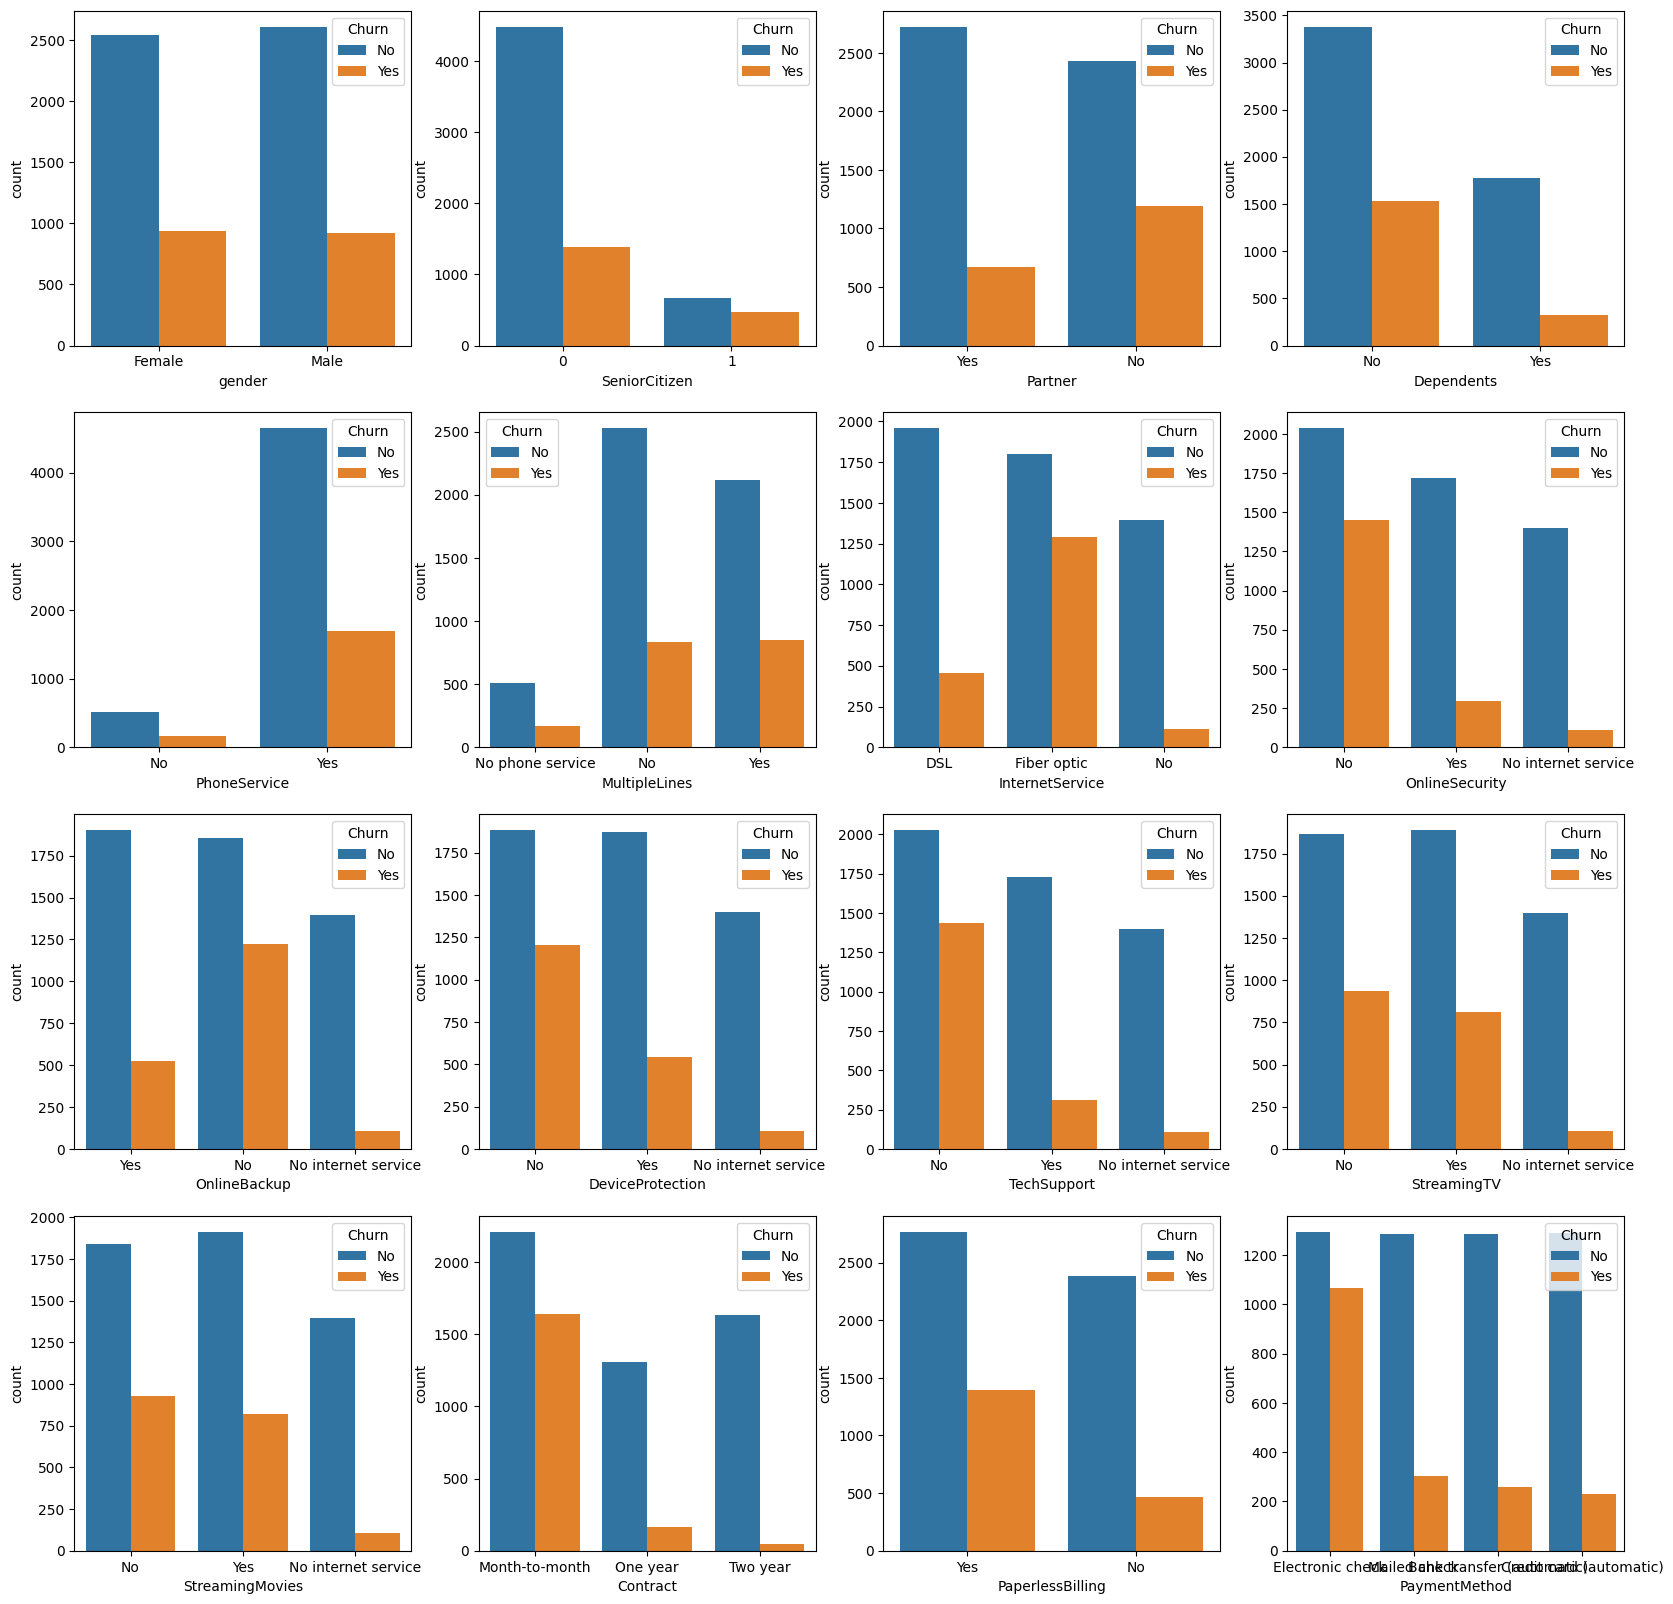

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))

for row_idx, row_ax in enumerate(axes):
    for col_idx, col_ax in enumerate(row_ax):
        sns.countplot(x=cat_feat[row_idx*4 + col_idx], data=df, ax=col_ax, hue='Churn')

#### Let us now look at heatmap of numerical columns

In [20]:
numer_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

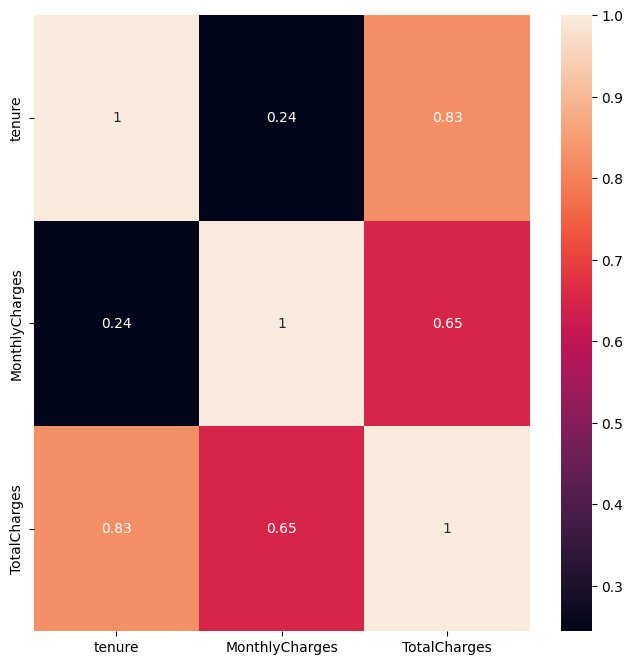

In [21]:
df_num = df[numer_col]

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(df_num.corr(), annot=True, ax=ax)
plt.show()

#### We see that tenure and TotalCharges are highly correlated which is expected because longer customer is with the company higher should be the charges.

## Label Encoding for binary features and one-hot for other categorical features

In [22]:
bin_feat = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']

In [23]:
# Label encoding for binary features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in bin_feat:
    df[col] = le.fit_transform(df[col])

In [24]:
# One-hot encoding for other categorical features
df = pd.get_dummies(df, drop_first=True)


In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


#### Let us do ANOVA F-test to see how average value of the features varies between the two classes

In [26]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [27]:
from sklearn.feature_selection import f_classif
[f_stat, p_value] = f_classif(X, y)

In [28]:
f_test_df = pd.DataFrame({
    'Features':X.columns,
    'F statistic': f_stat,
    'p value': p_value
})

In [29]:
f_test_df.sort_values('p value')

,Features,F statistic,p value
4,tenure,999.755231,3.093127e-205
11,InternetService_Fiber optic,732.439926,1.649750e-153
26,Contract_Two year,700.104043,3.952082e-147
28,PaymentMethod_Electronic check,698.590424,7.872389e-147
21,StreamingTV_No internet service,385.063472,1.661638e-83
17,DeviceProtection_No internet service,385.063472,1.661638e-83
23,StreamingMovies_No internet service,385.063472,1.661638e-83
15,OnlineBackup_No internet service,385.063472,1.661638e-83
19,TechSupport_No internet service,385.063472,1.661638e-83
12,InternetService_No,385.063472,1.661638e-83


#### Though we will not use above data for feature selection but extremely small p values for many of the features suggest that average value of these features in the two classes are very different. It suggests that these features will be useful in prediction

#### Export the cleaned and processed data into a csv file which can be used for further analysis

In [31]:
df.to_csv('Telco_Customer_Churn_clean.csv', index= False)